In [139]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import string
import matplotlib.pyplot as plt

### **Basic Import and Checking for Null values, imbalance in dataset**

In [140]:
dtf = pd.read_csv('Spam Email raw text for NLP.csv')
dtf.drop(['FILE_NAME'], axis=1, inplace=True)
dtf.head()

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...


In [141]:
dtf.isnull().sum()

CATEGORY    0
MESSAGE     0
dtype: int64

In [142]:
dtf['CATEGORY'].value_counts(normalize=True)

0    0.672878
1    0.327122
Name: CATEGORY, dtype: float64

## **Preprocessing**

#### ___Pre-Processing 1: Removing html, numbers, punctuation and lower casing the messages___

In [165]:
def preprocess1(text):
    # removing \n
    text = re.sub(r'[\n]',' ',text) 
    # removing HTML Tags
    text = re.sub(r'<.*?>',' ',text)
    # removing URLs
    text = re.sub(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|text|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:\'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|text|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""", '',text)
    # removing numbers and punctations
    text = re.sub(r'[^a-zA-Z]',' ',text)
    # removing individual stray alphabets
    text = re.sub(r'\b[a-zA-Z]\b','', text)
    # lower casing 
    text = text.lower()
    
    return text
#preprocess1('This is a multi-part message in MIME format.\n\n\n\n------=_NextPart_000_1CDC19_01C25366.4B57F3A0\n\nContent-Type: text/plain;\n\n\tcharset="Windows-1252"\n\nContent-Transfer-Encoding: quoted-printable\n\n\n\n We dare you...\n\n Try to find a better annuity!\n\n=20\n\n  - 5.40% Guaranteed for 6 Years=0A=\n\n- 6 Year Surrender Charge=0A=\n\n- 5% Agent\n\nCommission up to age 80=09\n\nCall today for more information!\n\n 800-888-7641 ext. 103\n\n- or -\n\n\n\nPlease fill out the form below for more information\t=20\n\nName:\t \t  =09\n\nE-mail:\t \t=20\n\nPhone:\t \t=20\n\nCity:\t \t State:\t \t=20\n\n \t    =09\n\n=20\n\n PMG Financial Services\n\n*5.40% for deposits of $100,000 and up, 5.25% interest for deposits\n\ntotalling $25,000-$99,999.\t=20\n\nWe don\'t want anyone to receive our mailings who does not wish to\n\nreceive them. This is a professional communication sent to insurance\n\nprofessionals. To be removed from this mailing list, DO NOT REPLY to\n\nthis message. Instead, go here: http://www.insuranceiq.com/optout\n\n<http://www.insuranceiq.com/optout/>=20\n\n\n\nLegal Notice <http://www.insiq.com/legal.htm>=20\n\n\n\n------=_NextPart_000_1CDC19_01C25366.4B57F3A0\n\nContent-Type: text/html;\n\n\tcharset="iso-8859-1"\n\nContent-Transfer-Encoding: quoted-printable\n\n\n\n<html>\n\n<head>\n\n<title>We Dare You to Find a Better Annuity</title>\n\n<meta http-equiv=3D"Content-Type" content=3D"text/html; =\n\ncharset=3Diso-8859-1">\n\n</head>\n\n<body bgcolor=3D"#666666" text=3D"#000000">\n\n<font face=3D"Arial, Helvetica, sans-serif">=20\n\n<table width=3D"550" border=3D"1" align=3D"center" cellpadding=3D"0" =\n\ncellspacing=3D"0" bordercolor=3D"#000000" bgcolor=3D"#FFFFFF">\n\n  <tr>=20\n\n    <td>\n\n      <img src=3D"http://iiq.us/images/pmg/20020822-101.gif" alt=3D"We =\n\ndare you..." width=3D"550" height=3D"55"><br>\n\n      <img src=3D"http://iiq.us/images/pmg/20020822-102.jpg" alt=3D"Try =\n\nto find a better annuity!" width=3D"550" height=3D"47"><br>\n\n      <img src=3D"http://iiq.us/images/pmg/20020822-103.jpg" =\n\nwidth=3D"550" height=3D"248">=20\n\n      <table width=3D"100%" cellpadding=3D"2" cellspacing=3D"2" =\n\nborder=3D"0" bgcolor=3D"#ffffff">\n\n        <tr>=20\n\n          <td><img src=3D"http://iiq.us/images/pmg/20020822-201.gif" =\n\nwidth=3D"32" height=3D"142"><img =\n\nsrc=3D"http://iiq.us/images/pmg/20020822-202.gif" alt=3D"- 5.40% =\n\nGuaranteed for 6 Years&#10;- 6 Year Surrender Charge&#10;- 5% Agent =\n\nCommission up to age 80" width=3D"508" height=3D"142"></td>\n\n        </tr>\n\n        <tr>=20\n\n          <td align=3D"center">\n\n            <b><font size=3D"2">Call today for more information!<br>\n\n            <img src=3D"http://iiq.us/images/pmg/20020822-3.gif" =\n\nalt=3D"800-888-7641 ext. 103" width=3D"535" height=3D"115"><br>\n\n            - or -</font></b><br>\n\n            <table width=3D"95%" border=3D"1" cellpadding=3D"0" =\n\ncellspacing=3D"0" bordercolor=3D"#000000">\n\n              <tr>=20\n\n                <form method=3D"post" =\n\naction=3D"http://65.217.159.103/response/response.asp">\n\n                  <td>=20\n\n                    <table width=3D"100%" border=3D"0" align=3D"center" =\n\ncellpadding=3D"2" cellspacing=3D"0" =\n\nbackground=3D"http://iiq.us/images/pmg/20020822-5.gif" =\n\nbgcolor=3D"#ffffff">\n\n                      <tr>=20\n\n                        <td colspan=3D"5" align=3D"center"><b><font =\n\nsize=3D"2">Please fill out the form below for more =\n\ninformation</font></b></td>\n\n                      </tr>\n\n                      <tr>=20\n\n                        <td width=3D"15%" align=3D"right"><b><font =\n\nsize=3D"2">Name:</font></b></td>\n\n                        <td colspan=3D"3"><input type=3D"text" =\n\nname=3D"contactname" size=3D"50"></td>\n\n                        <td rowspan=3D"5" valign=3D"middle" =\n\nalign=3D"center"><img src=3D"http://iiq.us/images/q3.gif" width=3D"43" =\n\nheight=3D"50"></td>\n\n                      </tr>\n\n                      <tr>=20\n\n                        <td width=3D"15%" align=3D"right"><b><font =\n\nsize=3D"2">E-mail:</font></b></td>\n\n                        <td colspan=3D"3"><input type=3D"text" =\n\nname=3D"email" size=3D"50"></td>\n\n                      </tr>\n\n                      <tr>=20\n\n                        <td width=3D"15%" align=3D"right"><b><font =\n\nsize=3D"2">Phone:</font></b></td>\n\n                        <td colspan=3D"3"><input type=3D"text" =\n\nname=3D"phone" size=3D"50"></td>\n\n                      </tr>\n\n                      <tr>=20\n\n                        <td width=3D"15%" align=3D"right"><b><font =\n\nsize=3D"2">City:</font></b></td>\n\n                        <td width=3D"30%"><input type=3D"text" =\n\nname=3D"city" size=3D"20"></td>\n\n                        <td width=3D"15%" align=3D"right"><b><font =\n\nsize=3D"2">State:</font></b></td>\n\n                        <td width=3D"20%"><input type=3D"text" =\n\nname=3D"state" size=3D"2"></td>\n\n                      </tr>\n\n                      <tr>=20\n\n                        <td width=3D"15%" align=3D"right">&nbsp;</td>\n\n                        <td width=3D"30%" colspan=3D\'3\'>=20\n\n                          <input type=3D"submit" name=3D"btnsubmit" =\n\nvalue=3D"Submit">\n\n                          <input type=3D"hidden" =\n\nname=3D"hdnRecipientTxt" value=3D"rhock@pmgsecurities.com">\n\n                          <input type=3D"hidden" name=3D"hdnSubjectTxt" =\n\nvalue=3D"PMG Dare Ad Inquiry">\n\n                        </td>\n\n                      </tr>\n\n                    </table>\n\n                  </td>\n\n                <input type=3D\'hidden\' name=3D\'SentTo\' value=3D\'304704\'>\n\n</form>\n\n              </tr>\n\n            </table>\n\n            <b><font size=3D"2"><img =\n\nsrc=3D"http://iiq.us/images/pmg/20020822-4.gif" alt=3D"PMG Financial =\n\nServices" width=3D"416" height=3D"142">=20\n\n            </font></b></td>\n\n        </tr>\n\n        <tr>=20\n\n          <td><font size=3D"1">*5.40% for deposits of $100,000 and up, =\n\n5.25% interest for deposits totalling $25,000-$99,999.</font></td>\n\n        </tr>\n\n      </table>\n\n\t\t</td>\n\n  </tr>\n\n  <tr>=20\n\n    <td width=3D"100%" bgcolor=3D"#cccccc" align=3D"center">\n\n\t\t\t<p><font face=3D"Arial, Helvetica, sans-serif" size=3D"1">We=20\n\n\t\t\tdon\'t want anyone to receive our mailings who does not=20\n\n\t\t\twish to receive them. This is a professional communication=20\n\n\t\t\tsent to insurance professionals. To be removed from this mailing=20\n\n\t\t\tlist, <b>DO NOT REPLY</b> to this message. Instead, go here: <a =\n\nhref=3D"http://www.insuranceiq.com/optout/">=20\n\n\t\t\thttp://www.insuranceiq.com/optout</a></font></p>\n\n    </td>\n\n  </tr>\n\n</table>\n\n<center>\n\n  <a href=3D"http://www.insiq.com/legal.htm"><font size=3D"1" =\n\nface=3D"Arial, Helvetica, sans-serif">Legal Notice </font></a>=20\n\n</center>\n\n</font>\n\n</body>\n\n</html>\n\n\n\n------=_NextPart_000_1CDC19_01C25366.4B57F3A0--\n\n\n')

In [144]:
dtf['message_cleaned'] = dtf['MESSAGE'].apply(preprocess1)
dtf

,CATEGORY,MESSAGE,message_cleaned
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates are at thei...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,attention this is must for all computer user...
2,1,This is a multi-part message in MIME format.\n...,this is multi part message in mime format ...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information the new domain names...
4,1,This is the bottom line. If you can GIVE AWAY...,this is the bottom line if you can give away...
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",one of the but it not working very w...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,damien morton quoted approves html emo...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",on mon at che wrote t...
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",once upon time manfred wrote would l...


### ___Pre-Processing 2: Removing stop words and performing lemmatization/stemming___

In [145]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

ps =PorterStemmer()
lm = WordNetLemmatizer()

In [167]:
# making a stopwords list
st_words = stopwords.words('english')

def preprocess2(text, flg_stemm=False, flg_lemm=True):
    # Tokenization
    tokens = text.split()
    
    # Stemming implementation
    if flg_stemm == True:
        text = [ps.stem(word) for word in tokens if word not in st_words]
    # Lemmatization implementation
    if flg_lemm == True:
        text = [lm.lemmatize(word) for word in tokens if word not in st_words]
    
    return " ".join(text)

In [147]:
dtf['message_lemm'] = dtf['message_cleaned'].apply(lambda x: preprocess2(x, flg_stemm=False, flg_lemm=True))
dtf['message_stem'] = dtf['message_cleaned'].apply(lambda x: preprocess2(x, flg_stemm=True, flg_lemm=False))
dtf

,CATEGORY,MESSAGE,message_cleaned,message_lemm,message_stem
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",dear homeowner interest rates are at thei...,dear homeowner interest rate lowest point year...,dear homeown interest rate lowest point year h...
1,1,ATTENTION: This is a MUST for ALL Computer Use...,attention this is must for all computer user...,attention must computer user new special packa...,attent must comput user new special packag dea...
2,1,This is a multi-part message in MIME format.\n...,this is multi part message in mime format ...,multi part message mime format nextpart cdc co...,multi part messag mime format nextpart cdc con...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,important information the new domain names...,important information new domain name finally ...,import inform new domain name final avail gene...
4,1,This is the bottom line. If you can GIVE AWAY...,this is the bottom line if you can give away...,bottom line give away cd free people like one ...,bottom line give away cd free peopl like one m...
...,...,...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",one of the but it not working very w...,one working well week te update server syncing...,one work well week te updat server sync origin...
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,damien morton quoted approves html emo...,damien morton quoted approves html emotitags a...,damien morton quot approv html emotitag abl sa...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",on mon at che wrote t...,mon che wrote thats correct line added source ...,mon che wrote that correct line ad sourc list ...
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",once upon time manfred wrote would l...,upon time manfred wrote would like install rpm...,upon time manfr wrote would like instal rpm tr...


In [148]:
corpus1 = []
for sent in dtf['message_lemm'].values:
    for word in sent.split():
            corpus1.append(word)
len(corpus1)

1030551

In [149]:
from collections import Counter
Counter(corpus1).most_common(10)

[('nbsp', 11784),
 ('list', 5933),
 ('email', 4399),
 ('one', 4042),
 ('get', 3886),
 ('free', 3379),
 ('time', 3328),
 ('mail', 3205),
 ('linux', 3142),
 ('message', 2859)]

In [169]:
len(Counter(corpus1)), len(corpus1)

(133006, 1030551)

(-0.5, 399.5, 199.5, -0.5)

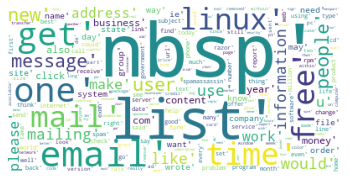

In [150]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(corpus1))
plt.imshow(word_cloud)
plt.axis('off')

## __Model_Building__

### ___Tf-Idf___

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dtf, dtf['CATEGORY'], test_size=0.2)

tfidf_lemm = TfidfVectorizer(max_features=2500)
tfidf_stem = TfidfVectorizer(max_features=2500)

labels = {0: 'Not Spam', 1: 'Spam'}

### ___Lemmatization___

In [152]:
x_train.head(1)

,CATEGORY,MESSAGE,message_cleaned,message_lemm,message_stem
633,1,Unbelievable Prices On Cell Phones And Accesso...,unbelievable prices on cell phones and accesso...,unbelievable price cell phone accessory hand f...,unbeliev price cell phone accessori hand free ...


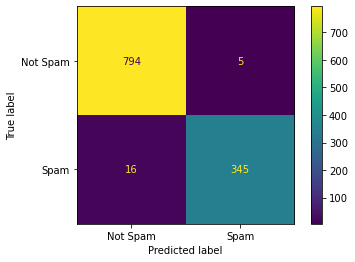

In [153]:
X_train = tfidf_lemm.fit_transform(x_train['message_lemm']).toarray()
spam_detect_lemm = MultinomialNB().fit(X_train,y_train)

X_test = tfidf_lemm.transform(x_test['message_lemm'])
y_pred = spam_detect_lemm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Spam', 'Spam'])      # 0:not_spam,  1:spam
disp.plot()

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       799
           1       0.99      0.96      0.97       361

    accuracy                           0.98      1160
   macro avg       0.98      0.97      0.98      1160
weighted avg       0.98      0.98      0.98      1160



### ___Stemming___

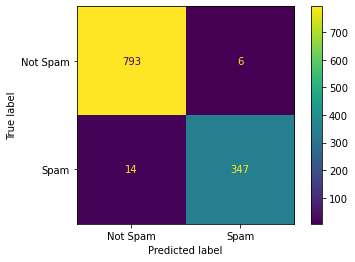

In [155]:
X_train = tfidf_stem.fit_transform(x_train['message_stem']).toarray()
spam_detect_stem = MultinomialNB().fit(X_train,y_train)

X_test = tfidf_stem.transform(x_test['message_stem'])
y_pred = spam_detect_stem.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Spam', 'Spam'])      # 0:not_spam,  1:spam
disp.plot()

In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       799
           1       0.98      0.96      0.97       361

    accuracy                           0.98      1160
   macro avg       0.98      0.98      0.98      1160
weighted avg       0.98      0.98      0.98      1160



## ___CountVectorizer___

In [157]:
from sklearn.feature_extraction.text import CountVectorizer

cvect_lemm = CountVectorizer(max_features=2500)
cvect_stem = CountVectorizer(max_features=2500)

labels = {0: 'Not Spam', 1: 'Spam'}

### ___Lemmatization___

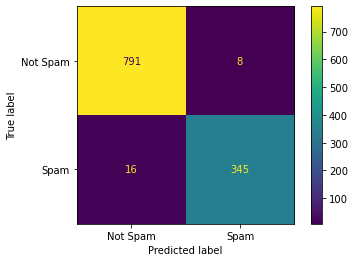

In [158]:
X_train = cvect_lemm.fit_transform(x_train['message_lemm']).toarray()
spam_detect_lemm = MultinomialNB().fit(X_train,y_train)

X_test = cvect_lemm.transform(x_test['message_lemm'])
y_pred = spam_detect_lemm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Spam', 'Spam'])      # 0:not_spam,  1:spam
disp.plot()

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       799
           1       0.98      0.96      0.97       361

    accuracy                           0.98      1160
   macro avg       0.98      0.97      0.98      1160
weighted avg       0.98      0.98      0.98      1160



### ___Stemming___

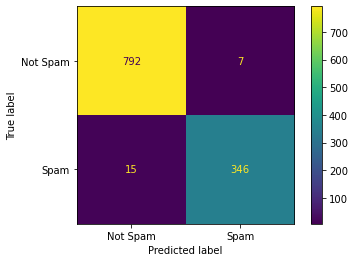

In [160]:
X_train = cvect_stem.fit_transform(x_train['message_stem']).toarray()
spam_detect_stem = MultinomialNB().fit(X_train,y_train)

X_test = cvect_stem.transform(x_test['message_stem'])
y_pred = spam_detect_stem.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not Spam', 'Spam'])      # 0:not_spam,  1:spam
disp.plot()

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       799
           1       0.98      0.96      0.97       361

    accuracy                           0.98      1160
   macro avg       0.98      0.97      0.98      1160
weighted avg       0.98      0.98      0.98      1160



## ___cross_val_score___

In [166]:
from sklearn.model_selection import cross_val_score
spam_detect = MultinomialNB()
cross_val_score(spam_detect, tfidf_lemm.fit_transform(dtf['message_lemm']), dtf['CATEGORY'], cv=5)

array([0.97327586, 0.98360656, 0.98188093, 0.98274374, 0.98101812])